# Portfolio selection

In this section, we will perform a lot of data analysis on a basket of assets to determine which ones are the most suitable for a short-term return.

In [1]:
# Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance

In [2]:
# List of chosen tickers
tickers = ['QQQ', 'VTV', 'ARKK', 'NVDA', 'AMZN', 'UNH', 'JPM', 'CAT', 'EEM', 'IEFA', 'IEF', 'TIP', 'GLD']

In [3]:
# Download historical price data
data = yf.download(tickers, start='2009-01-01', end='2024-09-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%***********************]  13 of 13 completed


## Correlation for dependencies

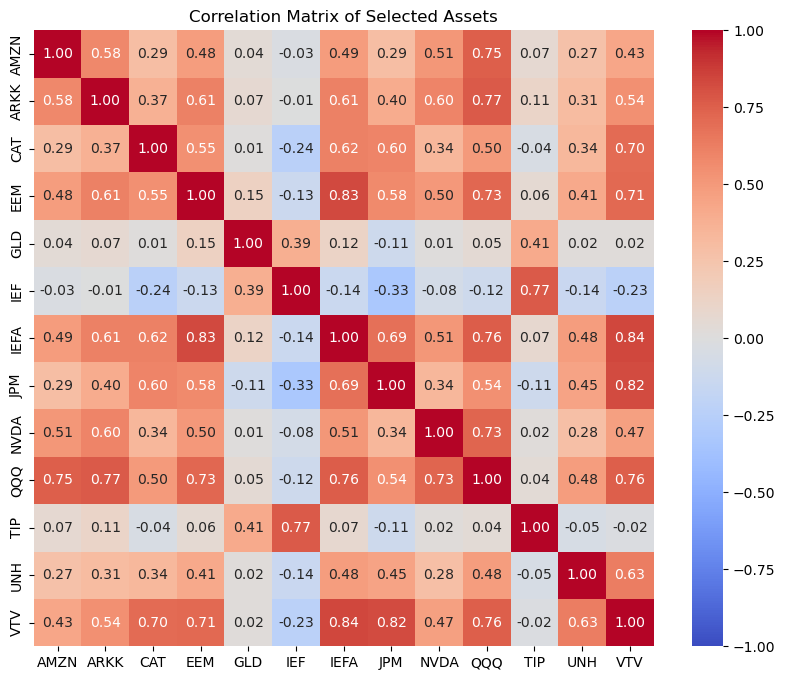

In [4]:
# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation matrix with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix of Selected Assets")
plt.show()

## Correlation Analysis Summary

Based on the correlation matrix, here are some key observations and initial insights into the relationships among the selected assets. This summary focuses on identifying potential diversification opportunities and clustering assets with high correlations.

### Key Observations and First Thoughts

1. **High-Correlation Clusters (Growth-Oriented and U.S.-Focused Assets)**:
   - **QQQ** (Invesco QQQ), **ARKK** (ARK Innovation ETF), and **VTV** (Vanguard Value ETF) are highly correlated, with values ranging from 0.73 to 0.77. These assets likely respond similarly to market trends, particularly in the U.S. equity market, where they are concentrated. They may not provide strong diversification when grouped together.
   - **IEFA** (International Developed Markets ETF) and **EEM** (Emerging Markets ETF) also show strong correlations with U.S.-focused ETFs like **QQQ** and **VTV**. This suggests that although they offer international exposure, they still move similarly to U.S. equities, possibly due to globalization effects and interdependence in financial markets.

2. **Defensive and Diversifying Assets (Lower Correlation with Equities)**:
   - **IEF** (Treasury Bond ETF) and **TIP** (TIPS Bond ETF) generally have low or negative correlations with equity assets (such as **QQQ**, **ARKK**, and **JPM**). This indicates that they can serve as stabilizers in the portfolio, as they are less likely to fluctuate in tandem with equities. **IEF** (Treasuries) in particular has negative correlations with several equities (e.g., -0.33 with **JPM** and -0.24 with **CAT**).
   - **GLD** (Gold ETF) has minimal correlations with most assets, making it a strong candidate for diversification. For example, its correlations with **QQQ** (0.05), **ARKK** (0.06), and **CAT** (0.01) are close to zero, suggesting it doesn’t follow the same price movements as the equities.

3. **Sector-Specific Patterns**:
   - **JPM** (JPMorgan Chase) and **CAT** (Caterpillar) show moderate to high correlations with each other and with **VTV** (Vanguard Value ETF) and **IEFA**. This could be due to sector and economic cycle effects, as financials and industrials tend to be cyclically linked to economic conditions. **CAT** and **JPM** also have notable correlations with **VTV** (0.70 and 0.82, respectively), aligning with the value-oriented nature of these stocks.
   - **UNH** (UnitedHealth) is moderately correlated with both U.S. and international equities but generally maintains a lower correlation than the high-growth tech stocks. This is characteristic of healthcare, which is often less sensitive to economic cycles and provides some stability.

4. **Diversification Potential**:
   - **TIP** and **IEF** (bond ETFs) and **GLD** (gold ETF) stand out for their low correlations with most other assets, making them strong diversification candidates.
   - **GLD** in particular has near-zero correlation with several high-correlation clusters like **QQQ**, **ARKK**, and **VTV**, which suggests that it could reduce portfolio risk when combined with these assets.

5. **Mixed Correlation Assets**:
   - **EEM** (Emerging Markets ETF) and **IEFA** (International Developed Markets ETF) show relatively high correlations with U.S.-focused equities, like **QQQ** and **VTV**, suggesting that they may not provide as much geographic diversification as expected.
   - However, they are slightly less correlated with some U.S.-centric stocks, such as **UNH** and **CAT**, hinting at selective diversification potential when paired with certain sectors.

### Summary Recommendations Based on Correlations

- **High-Correlation Assets** (e.g., **QQQ**, **ARKK**, **VTV**, **EEM**, and **IEFA**) offer similar market responses. Select only one or two of these for a diversified portfolio to avoid redundancy.
- **Diversifiers**: **GLD**, **IEF**, and **TIP** show low correlations with equities, making them strong candidates for hedging risk. These can complement high-correlation growth assets.
- **Defensive Sector**: **UNH** provides some stability and diversification as it has moderate correlations with both U.S. and international equities but is generally less affected by economic cycles than tech stocks.
- **Sector and Economic Cycle Considerations**: **JPM** and **CAT** have notable correlations with each other and with **VTV** and **IEFA**, reflecting cyclical exposure. One of these could add value for cyclical diversification.

These insights should help guide asset selection based on correlations, especially if the goal is to balance growth with diversification to reduce overall portfolio risk.

## Returns for high growth rates

We know that for financial data, it is better to use geometric mean since it can gather the compounding growth rate. But, for simplicity, it is more suitable to use the arithmetic mean to fetch the returns for each assets. Most of time, the arithmetic is not too far from the geometric mean.

In [6]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate annualized returns
annualized_returns = daily_returns.mean() * 252  # 252 trading days in a year

# Display annualized returns for each asset
annualized_returns_df = pd.DataFrame(annualized_returns, columns=['Annualized Return'])
print("Annualized Returns for Each Asset:")
print(annualized_returns_df)

Annualized Returns for Each Asset:
      Annualized Return
AMZN           0.304121
ARKK           0.161853
CAT            0.199111
EEM            0.046734
GLD            0.083466
IEF            0.013609
IEFA           0.073262
JPM            0.198155
NVDA           0.681691
QQQ            0.189515
TIP            0.023234
UNH            0.234734
VTV            0.115315


### Annualized Return Analysis

**NVDA** (68.2%) and **AMZN** (30.4%) lead with high growth, suggesting strong recent performance. **ARKK**, **QQQ** and **VTV** show modest returns, ideal for stability. **EEM** (4.7%) underperforms relative to others.

We didn't mention bond assets here since they are *risk free* and then are likely to have not much returns.

# Asset Selection for a Diversified Portfolio

Given our objective of selecting up to five assets for a diversified portfolio with strong performance potential, let’s analyze your correlation matrix and asset characteristics to identify the most qualified candidates. We’ll aim for assets that offer both growth potential and diversification benefits, balancing high-growth equities with lower-correlation assets to mitigate risk.

## Criteria for Asset Selection

To select the optimal five assets, we’ll consider:
1. **High Growth Potential**: Assets with strong performance, particularly from sectors like technology and emerging markets, which can drive returns in the short term.
2. **Diversification**: Assets with lower correlations to reduce portfolio risk. This helps avoid redundancy, so a downturn in one asset doesn’t drag down the entire portfolio.
3. **Risk Mitigation**: Including at least one defensive or low-correlation asset, such as bonds or gold, which can stabilize returns.

Based on the correlation matrix and diversification criteria, here are two well-balanced portfolio options with five assets each:

### Portfolio Option 1: High Growth with Moderate Diversification
- **QQQ** (U.S. Large-Cap Growth ETF): Provides broad tech exposure.
- **ARKK** (Innovation ETF): Adds high-growth, disruptive tech stocks.
- **EEM** (Emerging Markets ETF): Offers exposure to high-growth, non-U.S. markets.
- **IEF** (Treasury Bond ETF): Acts as a low-risk, stabilizing asset.
- **GLD** (Gold ETF): Provides an inflation hedge and reduces correlation with equities.

**Characteristics:**
- **Risk-Reward Balance**: High growth potential from tech and emerging markets combined with the stability of bonds and gold.
- **Diversification**: Moderate diversification with geographic and sector variety.

### Portfolio Option 2: Tech-Focused with High Diversification
- **QQQ** (U.S. Large-Cap Growth ETF): Core tech exposure.
- **NVDA** (Individual Tech Stock): Direct exposure to the high-growth semiconductor industry.
- **IEFA** (International Developed Markets ETF): Adds diversification outside the U.S. and emerging markets.
- **UNH** (Healthcare Stock): Provides a defensive stock from the healthcare sector with a lower correlation to tech stocks.
- **GLD** (Gold ETF): Serves as an inflation hedge and risk mitigator.

**Characteristics:**
- **Higher Growth Focus**: With both QQQ and NVDA, this portfolio leans heavily toward tech.
- **Enhanced Diversification**: Includes international, healthcare, and gold for balance.

## Rationale Behind Each Selection

- **QQQ**: Essential for exposure to U.S. tech giants, which drive growth and returns in high-growth periods.
- **ARKK** or **NVDA**: Adds targeted, high-growth potential through disruptive innovation (ARKK) or direct tech exposure (NVDA).
- **EEM** or **IEFA**: Provides non-U.S. equity exposure to reduce dependence on the U.S. market and benefit from global growth opportunities.
- **IEF** (Bonds): A stable asset that counterbalances equities, particularly valuable in volatile markets.
- **GLD** (Gold): Gold typically maintains value when equities decline, serving as a reliable hedge against market downturns and inflation.

## Next Steps for Portfolio Optimization
1. **Backtesting**: We'll test both portfolios over the past few years to see which one performed better in terms of returns and risk. This will give insights into how these assets work together historically.
2. **Portfolio Weight Optimization**: We'll use Modern Portfolio Theory (MPT) to calculate optimal weights for each asset, maximizing risk-adjusted returns (e.g., using the Sharpe ratio).
3. **Regular Rebalancing**: For short-term portfolios, we'll consider rebalancing every 3-6 months to align with changing market conditions.